In [ ]:

import json
results = {}
model = 'simpletransformer'
with open(f'predictions_{model}.json') as f:
  data_preds = json.load(f)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('CH2_final_evaluation.csv')

In [ ]:
df.tail()

,frame_id,steering_angle,public
5609,1479425721681585081,-0.089012,1
5610,1479425721731673391,-0.087266,0
5611,1479425721781662176,-0.088026,1
5612,1479425721831580656,-0.087266,1
5613,1479425721881751009,-0.087266,0


In [ ]:
preds = np.array(list(data_preds.values()))

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(preds).fit(smoothing_level=0.4,optimized=True)

In [ ]:
preds = fit1.fittedvalues

In [ ]:
preds.max()

0.798532597720623

In [ ]:
preds_public = preds[df['public'] == 1].reshape(-1)

In [ ]:
scores_public = df[df['public'] == 1].steering_angle.values

In [ ]:
results['public'] = np.sqrt(((preds_public - scores_public) ** 2).mean())

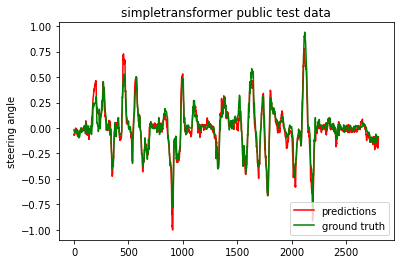

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(preds_public)),preds_public, c='r')
plt.plot(range(len(preds_public)),scores_public, c='g')
plt.title(f'{model} public test data')
plt.legend(["predictions", "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig(f'{model}_public.png')

In [ ]:
preds_private = preds[df['public'] == 0].reshape(-1)

In [ ]:
scores_private = df[df['public'] == 0].steering_angle.values

In [ ]:
results['private'] = np.sqrt(((scores_private - preds_private) ** 2).mean())

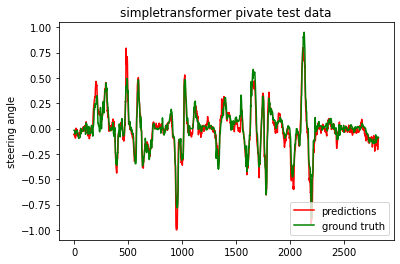

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(preds_private)),preds_private, c='r' )
plt.plot(range(len(scores_private)),scores_private, c='g' )
plt.title(f'{model} pivate test data')
plt.legend(["predictions", "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig(f'{model}_private.png')

# Smoothed Results Transformer + Optical Flow

In [ ]:
results

{'private': 0.05776100127854219, 'public': 0.05880042638620527}

# True results Transformer + Optical Flow



In [ ]:
results

{'private': 0.06148322485852823, 'public': 0.06309170100414047}

# Simple Transformer

In [ ]:
results

{'private': 0.06961743909601405, 'public': 0.07057953032219642}

# Transfer Learning

In [ ]:
results

{'private': 0.09779739247376845, 'public': 0.09811182755600123}

# DAVE2

In [ ]:
results

{'private': 0.13267114981468123, 'public': 0.13469364428594569}

# CNN-LSTM

In [ ]:
results

{'private': 0.07184337916453493, 'public': 0.07405454641684914}

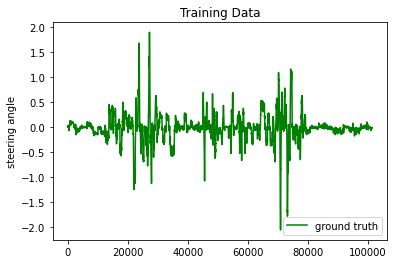

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_data)),train_data, c='g' )
plt.title(f'Training Data')
plt.legend([ "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig('train_data.png')